In [1]:
import pandas as pd

In [2]:
%%capture
!pip install seaborn


In [3]:
import seaborn as sns

In [85]:
df = pd.read_parquet('open_policing.parquet.gzip')

In [5]:
df

,Unnamed: 0,id,state,stop_date,stop_time,county_name,county_fips,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested
0,0,NV-2012-00001,NV,2012-02-14,None,None,NaN,None,50.0,White,Cell phone,True,None,True,Citation,False
1,1,NV-2012-00002,NV,2012-02-14,None,None,NaN,None,50.0,White,Paperwork,True,None,True,Citation,False
2,2,NV-2012-00003,NV,2012-02-14,None,None,NaN,None,35.0,White,Cell phone,True,None,True,Citation,False
3,3,NV-2012-00004,NV,2012-02-14,None,None,NaN,None,30.0,White,Other (non-mapped),True,None,True,Citation,False
4,4,NV-2012-00005,NV,2012-02-14,None,None,NaN,None,22.5,White,Paperwork,True,None,True,Citation,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383051,825113,MT-NA-07,MT,None,None,Dawson County,30021.0,M,NaN,White,"License,Other,Safe movement",False,None,False,Warning,False
3383052,825114,MT-NA-08,MT,None,None,Roosevelt County,30085.0,M,NaN,White,Speeding,False,None,False,Warning,False
3383053,825115,MT-NA-09,MT,None,None,Yellowstone County,30111.0,M,NaN,White,"DUI,Lights,Paperwork",False,None,False,Citation,False
3383054,825116,MT-NA-10,MT,None,None,Dawson County,30021.0,M,NaN,White,"License,Other,Speeding",False,None,False,Arrest,True


<h1>Start EDA </h1>

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'state', 'stop_date', 'stop_time', 'county_name',
       'county_fips', 'driver_gender', 'driver_age', 'driver_race',
       'violation', 'search_conducted', 'search_type', 'contraband_found',
       'stop_outcome', 'is_arrested'],
      dtype='object')

In [7]:
df['stop_date'] = pd.to_datetime(df['stop_date'])


## Get Summary Statistics

In [8]:
df.describe(include = 'all')

,Unnamed: 0,id,state,stop_date,stop_time,county_name,county_fips,driver_gender,driver_age,driver_race,violation,search_conducted,search_type,contraband_found,stop_outcome,is_arrested
count,3.383056e+06,3383056,3383056,3382947,2359362,2160425,2.160425e+06,2491112,2.257274e+06,3153324,3383056,3383056,38353,3383056,3382602,3383056
unique,NaN,3383056,5,NaN,1440,138,NaN,2,NaN,5,1520,2,54,2,12,2
top,NaN,NV-2012-00001,WI,NaN,16:00,Flathead County,NaN,M,NaN,White,Speeding,False,Incident to Arrest,False,Citation,False
freq,NaN,1,1059018,NaN,5748,73240,NaN,1685100,NaN,2707048,1276122,2455489,12010,2626179,2132197,3303778
mean,3.947681e+05,NaN,NaN,2013-04-25 20:40:13.478662144,NaN,NaN,4.490618e+04,NaN,3.781172e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,2005-01-02 00:00:00,NaN,NaN,3.000100e+04,NaN,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.712990e+05,NaN,NaN,2012-01-16 00:00:00,NaN,NaN,3.006300e+04,NaN,2.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.581230e+05,NaN,NaN,2013-08-25 00:00:00,NaN,NaN,5.002700e+04,NaN,3.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.918910e+05,NaN,NaN,2015-01-16 00:00:00,NaN,NaN,5.506300e+04,NaN,4.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.059032e+06,NaN,NaN,2016-12-31 00:00:00,NaN,NaN,5.514100e+04,NaN,9.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## `Get info on Dataframe to understand what the data types are`


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383056 entries, 0 to 3383055
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   id                object        
 2   state             object        
 3   stop_date         datetime64[ns]
 4   stop_time         object        
 5   county_name       object        
 6   county_fips       float64       
 7   driver_gender     object        
 8   driver_age        float64       
 9   driver_race       object        
 10  violation         object        
 11  search_conducted  bool          
 12  search_type       object        
 13  contraband_found  bool          
 14  stop_outcome      object        
 15  is_arrested       bool          
dtypes: bool(3), datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 345.2+ MB


## `Get Shape to get a sense of the number of rows and columns`


In [10]:
df.shape

(3383056, 16)

## `Check for duplicates - if they exist will likely drop`


In [11]:
df.duplicated().sum()

0

<h3>There are no duplicates, so skip removing them</h3>


## `Get the min and max stop date to understand the range of recording dates`


In [12]:
df['stop_date'].max()


Timestamp('2016-12-31 00:00:00')

In [13]:
df['stop_date'].min()

Timestamp('2005-01-02 00:00:00')

## `Check for nulls`


In [14]:
df.isnull().sum()

Unnamed: 0                0
id                        0
state                     0
stop_date               109
stop_time           1023694
county_name         1222631
county_fips         1222631
driver_gender        891944
driver_age          1125782
driver_race          229732
violation                 0
search_conducted          0
search_type         3344703
contraband_found          0
stop_outcome            454
is_arrested               0
dtype: int64

## `Get counts if stop resulted in an arrest`

In [15]:
is_arrested_cat = df['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat

,is_arrested,count
0,False,3303778
1,True,79278


<h3>Looks like a huge class imbalance, that can be fixed later</h3>

## `Let's get value counts`


Text(0.5, 1.0, 'Driver Race')

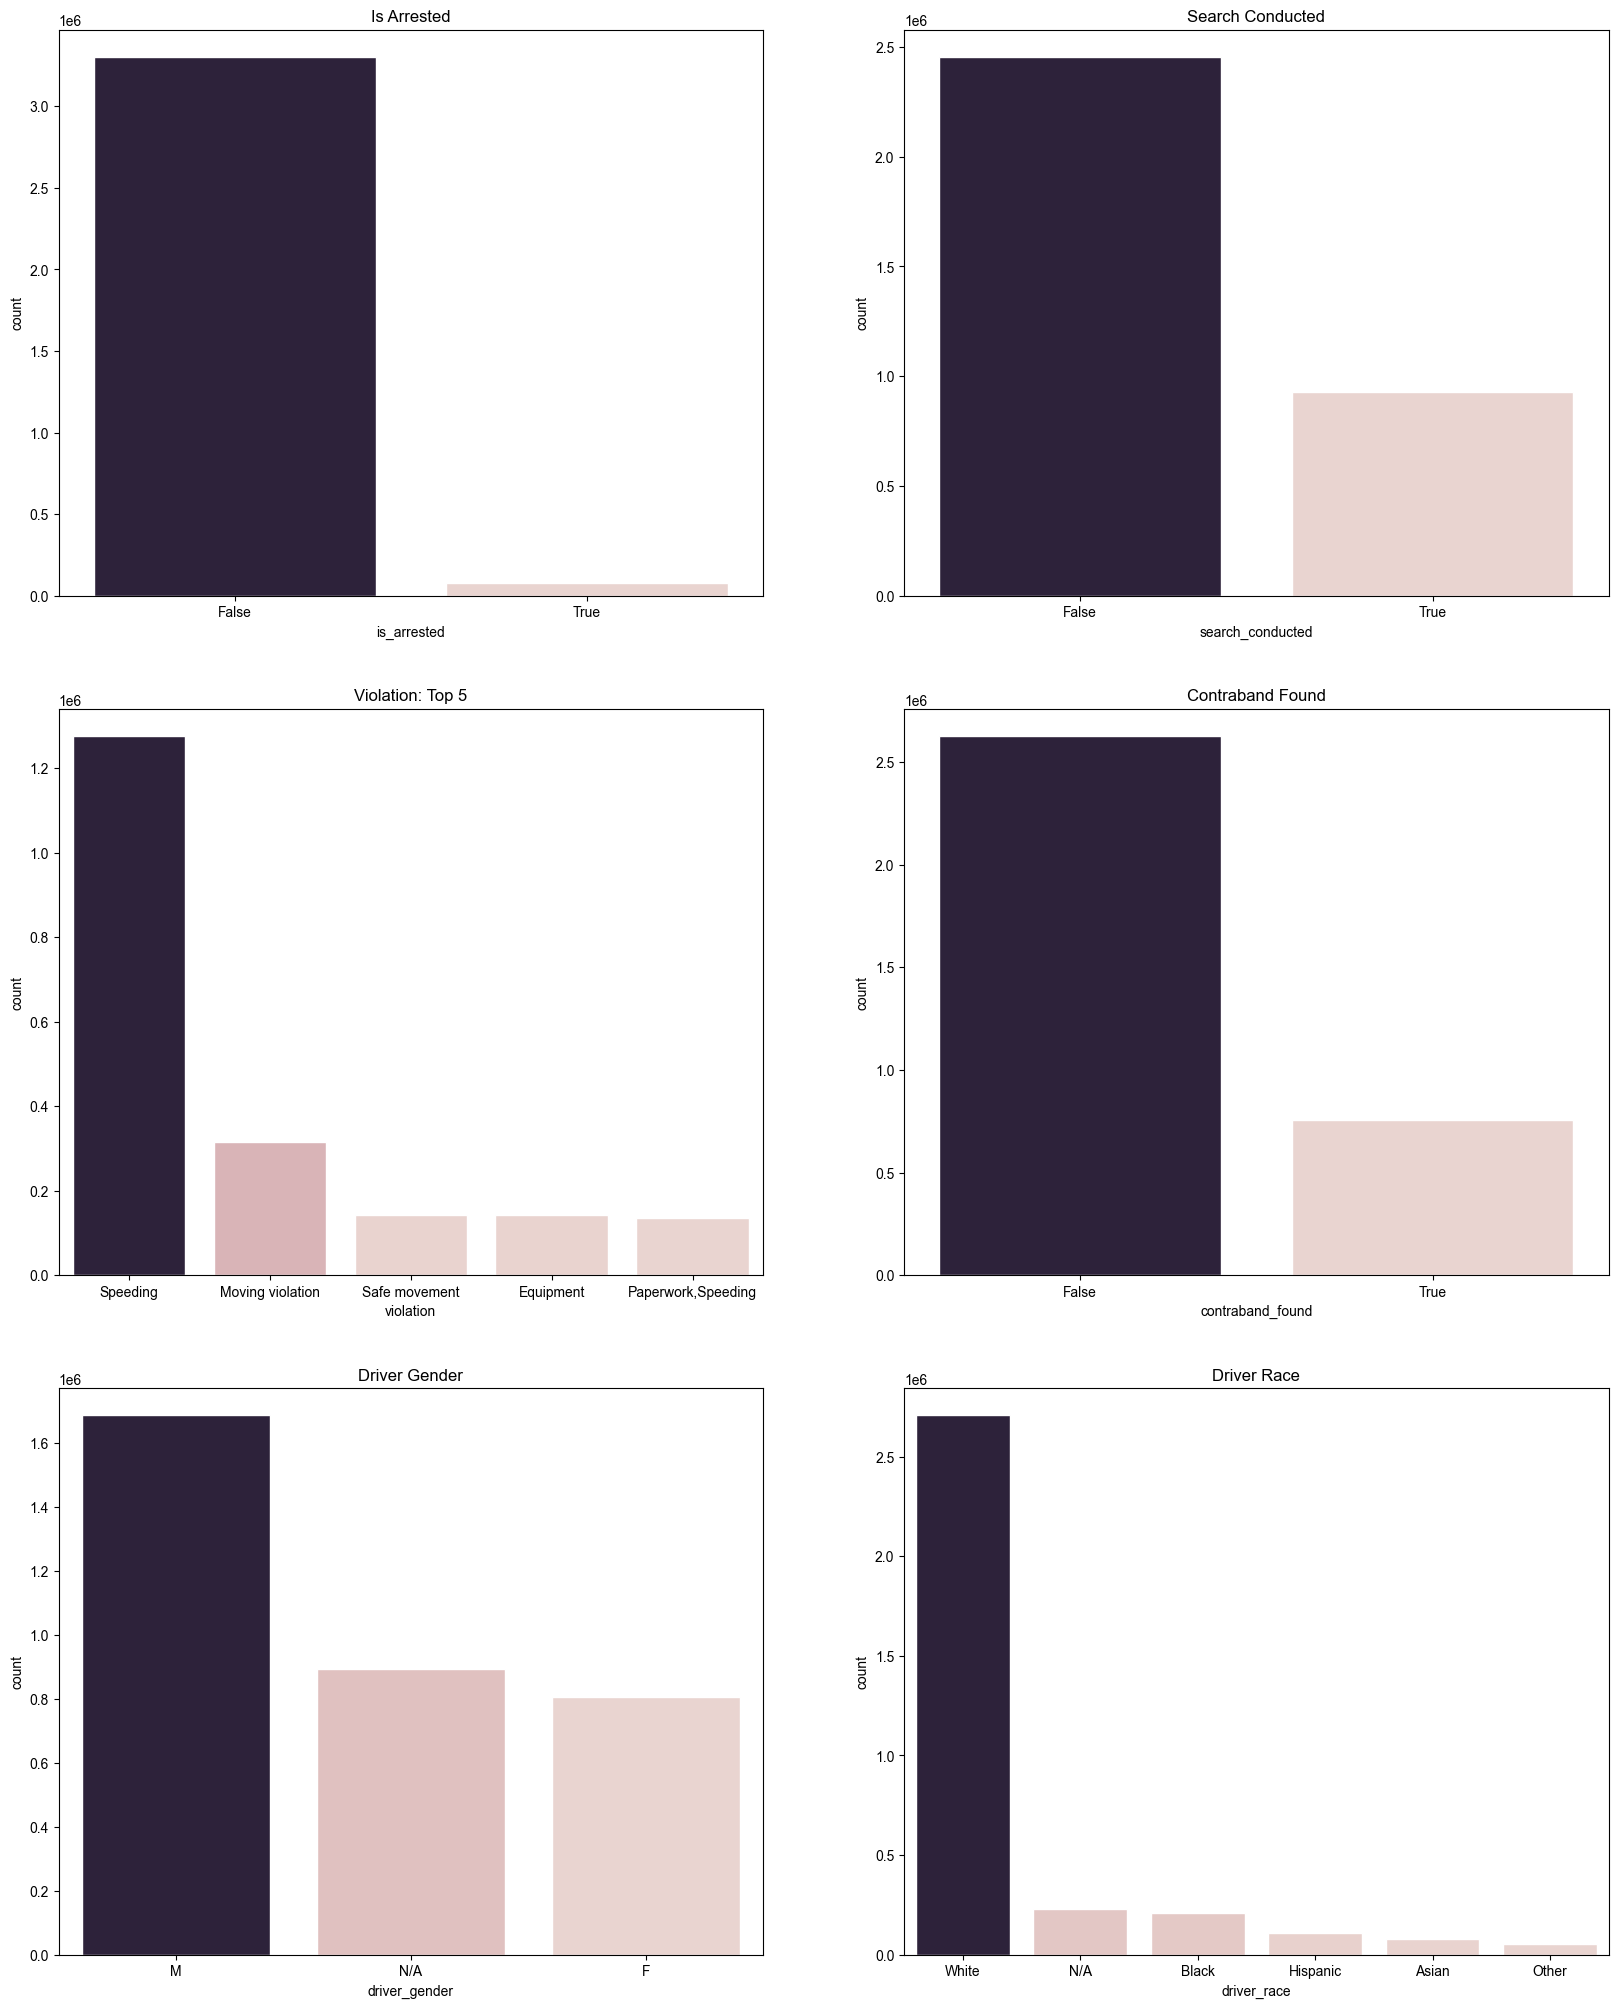

In [16]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2, figsize=(20, 25))
sns.set(style="whitegrid", color_codes=True)

is_arrested_cat = df['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat['count'] = is_arrested_cat['count'].astype(int)
sns.barplot(is_arrested_cat, x="is_arrested", y="count", hue="count", legend=False, ax=axes[0,0]).set_title("Is Arrested")

search_conducted_cat = df['search_conducted'].fillna('N/A').value_counts().to_frame().reset_index()
sns.barplot(search_conducted_cat, x="search_conducted", y="count", hue="count", legend=False,  ax=axes[0,1]).set_title("Search Conducted")

violation_cat = df['violation'].fillna('N/A').value_counts().to_frame().reset_index()
violation_cat_five = violation_cat.head(5)
sns.barplot(violation_cat_five, x="violation", y="count", hue="count", legend=False,  ax=axes[1,0]).set_title("Violation: Top 5")

contraband_found_cat = df['contraband_found'].fillna('N/A').value_counts().to_frame().reset_index()
sns.barplot(contraband_found_cat, x="contraband_found", y="count", hue="count", legend=False,  ax=axes[1,1]).set_title("Contraband Found")

gender_cat = df['driver_gender'].fillna('N/A').value_counts().to_frame().reset_index()
sns.barplot(gender_cat, x="driver_gender", y="count", hue="count", legend=False,  ax=axes[2,0]).set_title("Driver Gender")

race_cat = df['driver_race'].fillna('N/A').value_counts().to_frame().reset_index()
sns.barplot(race_cat, x="driver_race", y="count", hue="count", legend=False,  ax=axes[2,1]).set_title("Driver Race")



## `Observe distribution of ages`

In [17]:
age_cat = df[['driver_age']]
age_cat = age_cat[age_cat['driver_age'].notna()]


In [18]:
#sns.histplot(data=age_cat, x="driver_age")


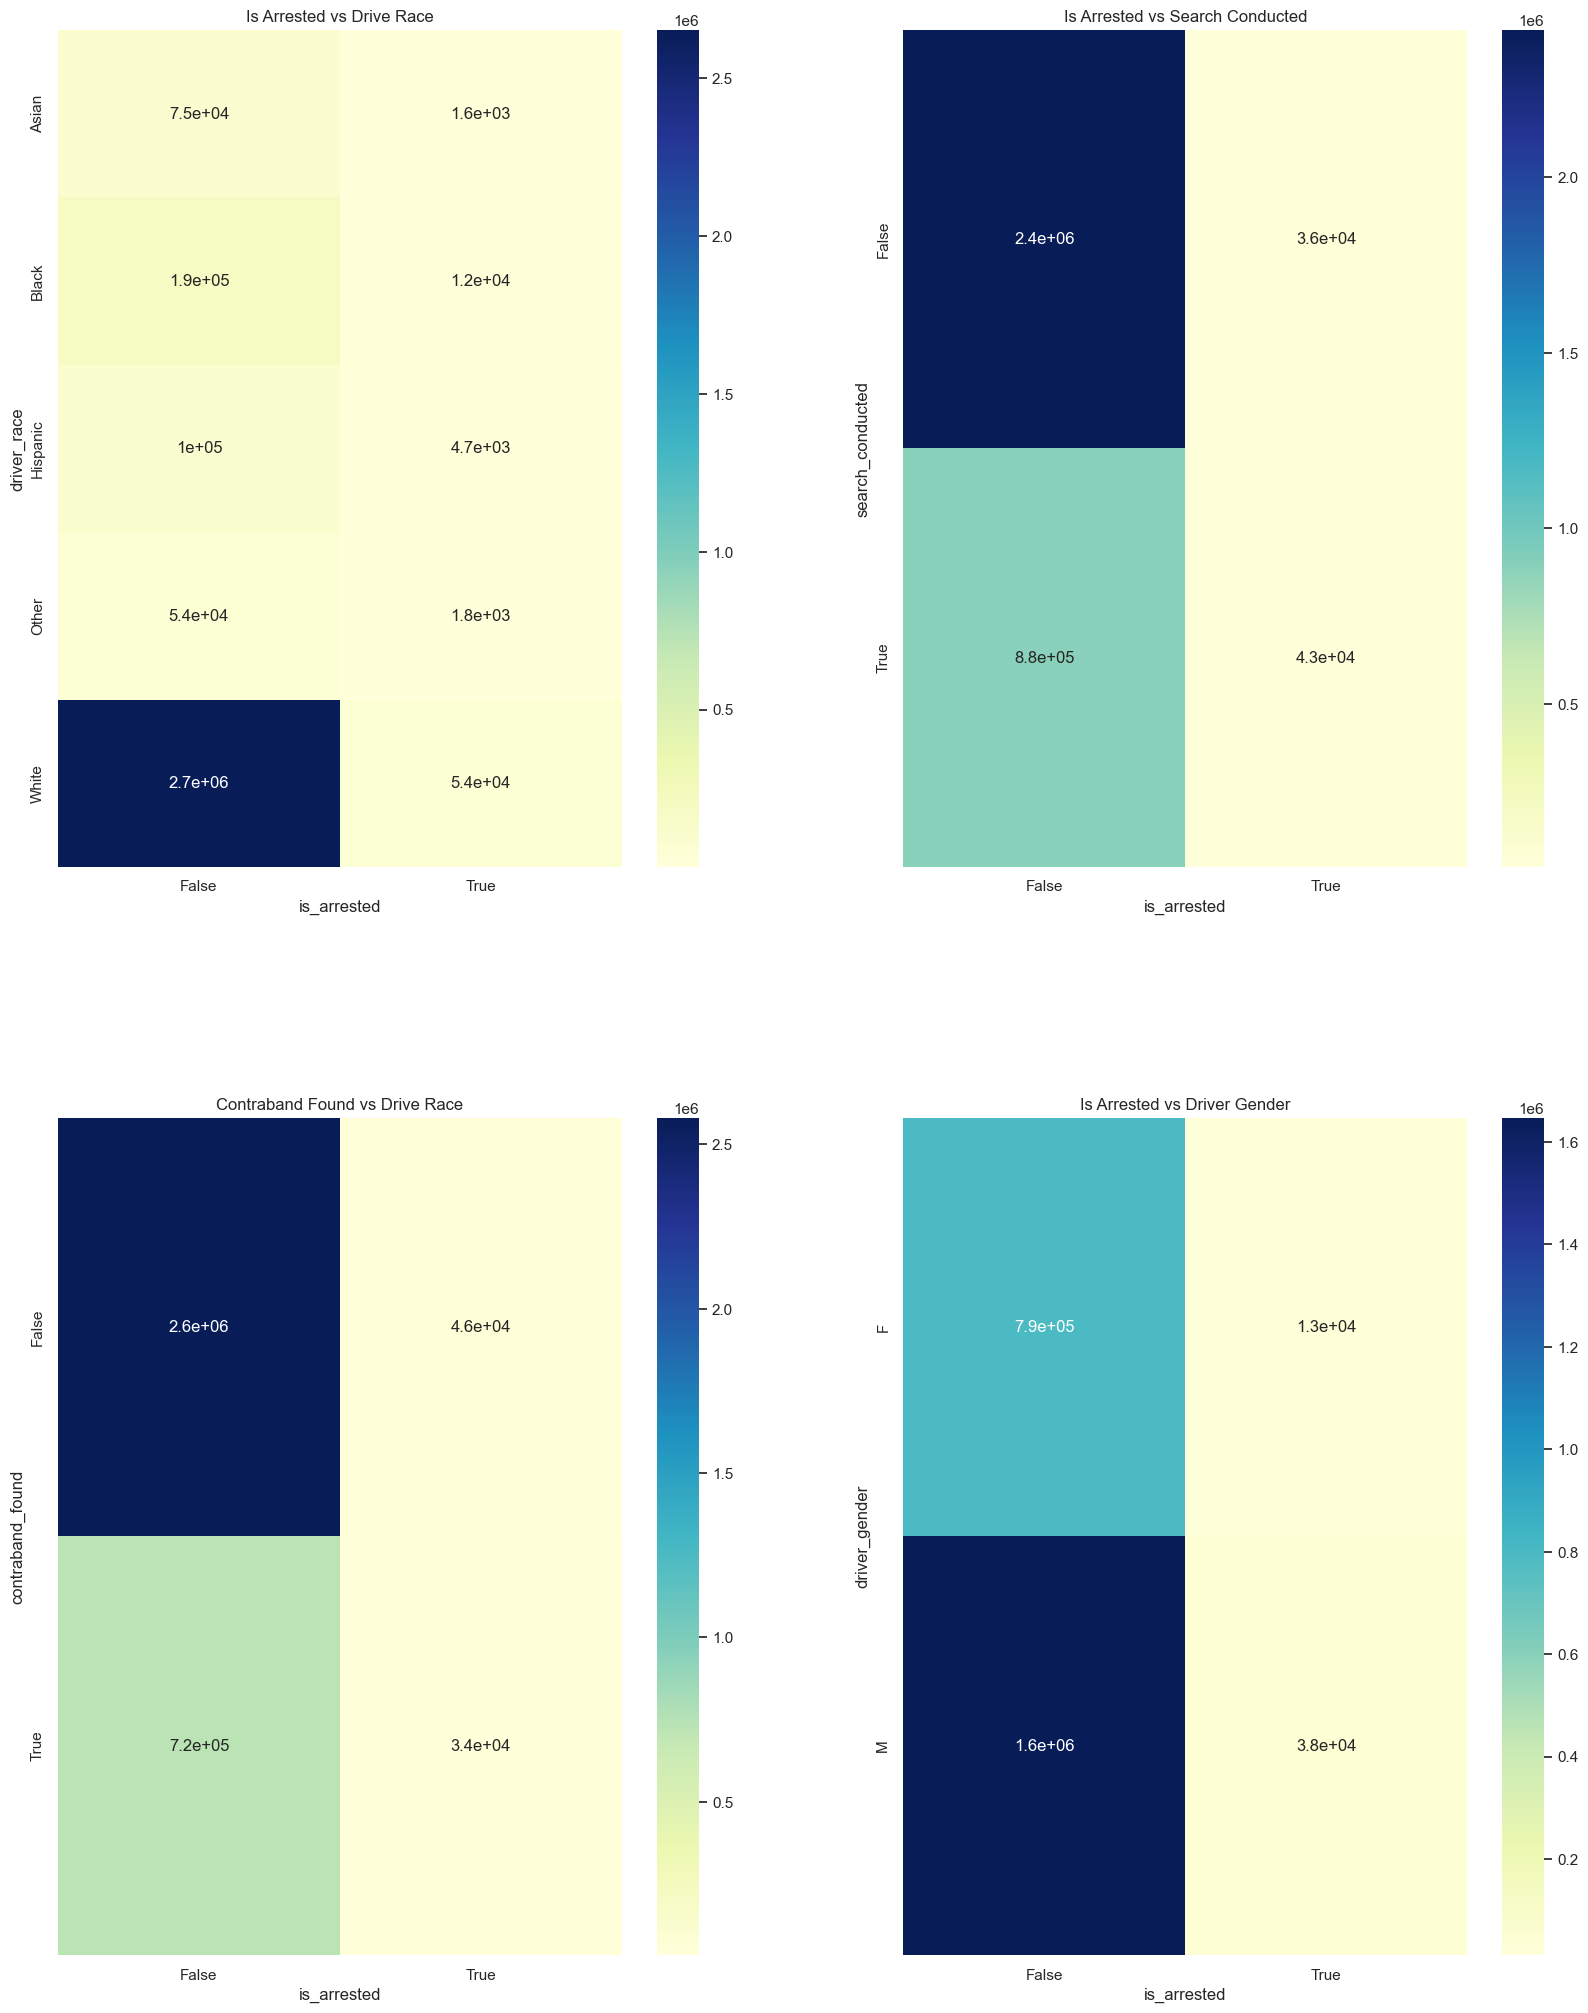

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(20, 25))
sns.set(style="whitegrid", color_codes=True)


contingency_table_dr = pd.crosstab(df['driver_race'], df['is_arrested'])
sns.heatmap(contingency_table_dr, annot=True, cmap="YlGnBu", ax=axes[0,0]).set_title("Is Arrested vs Drive Race")
#plt.show()

contingency_table_sc = pd.crosstab(df['search_conducted'], df['is_arrested'])
#contingency_table_dr = pd.crosstab(df['driver_race'], df['is_arrested'])
sns.heatmap(contingency_table_sc, annot=True, cmap="YlGnBu", ax=axes[0,1]).set_title("Is Arrested vs Search Conducted")
#plt.show()

contingency_table_cf = pd.crosstab(df['contraband_found'], df['is_arrested'])
sns.heatmap(contingency_table_cf, annot=True, cmap="YlGnBu", ax=axes[1,0]).set_title("Contraband Found vs Drive Race")
#plt.show()

contingency_table_dg = pd.crosstab(df['driver_gender'], df['is_arrested'])
sns.heatmap(contingency_table_dg, annot=True, cmap="YlGnBu", ax=axes[1,1]).set_title("Is Arrested vs Driver Gender")
#plt.show()
plt.subplots_adjust(hspace=0.3,wspace = 0.2)


In [20]:
%%capture
#pip install missingno


## `Observe null values`

<Axes: >

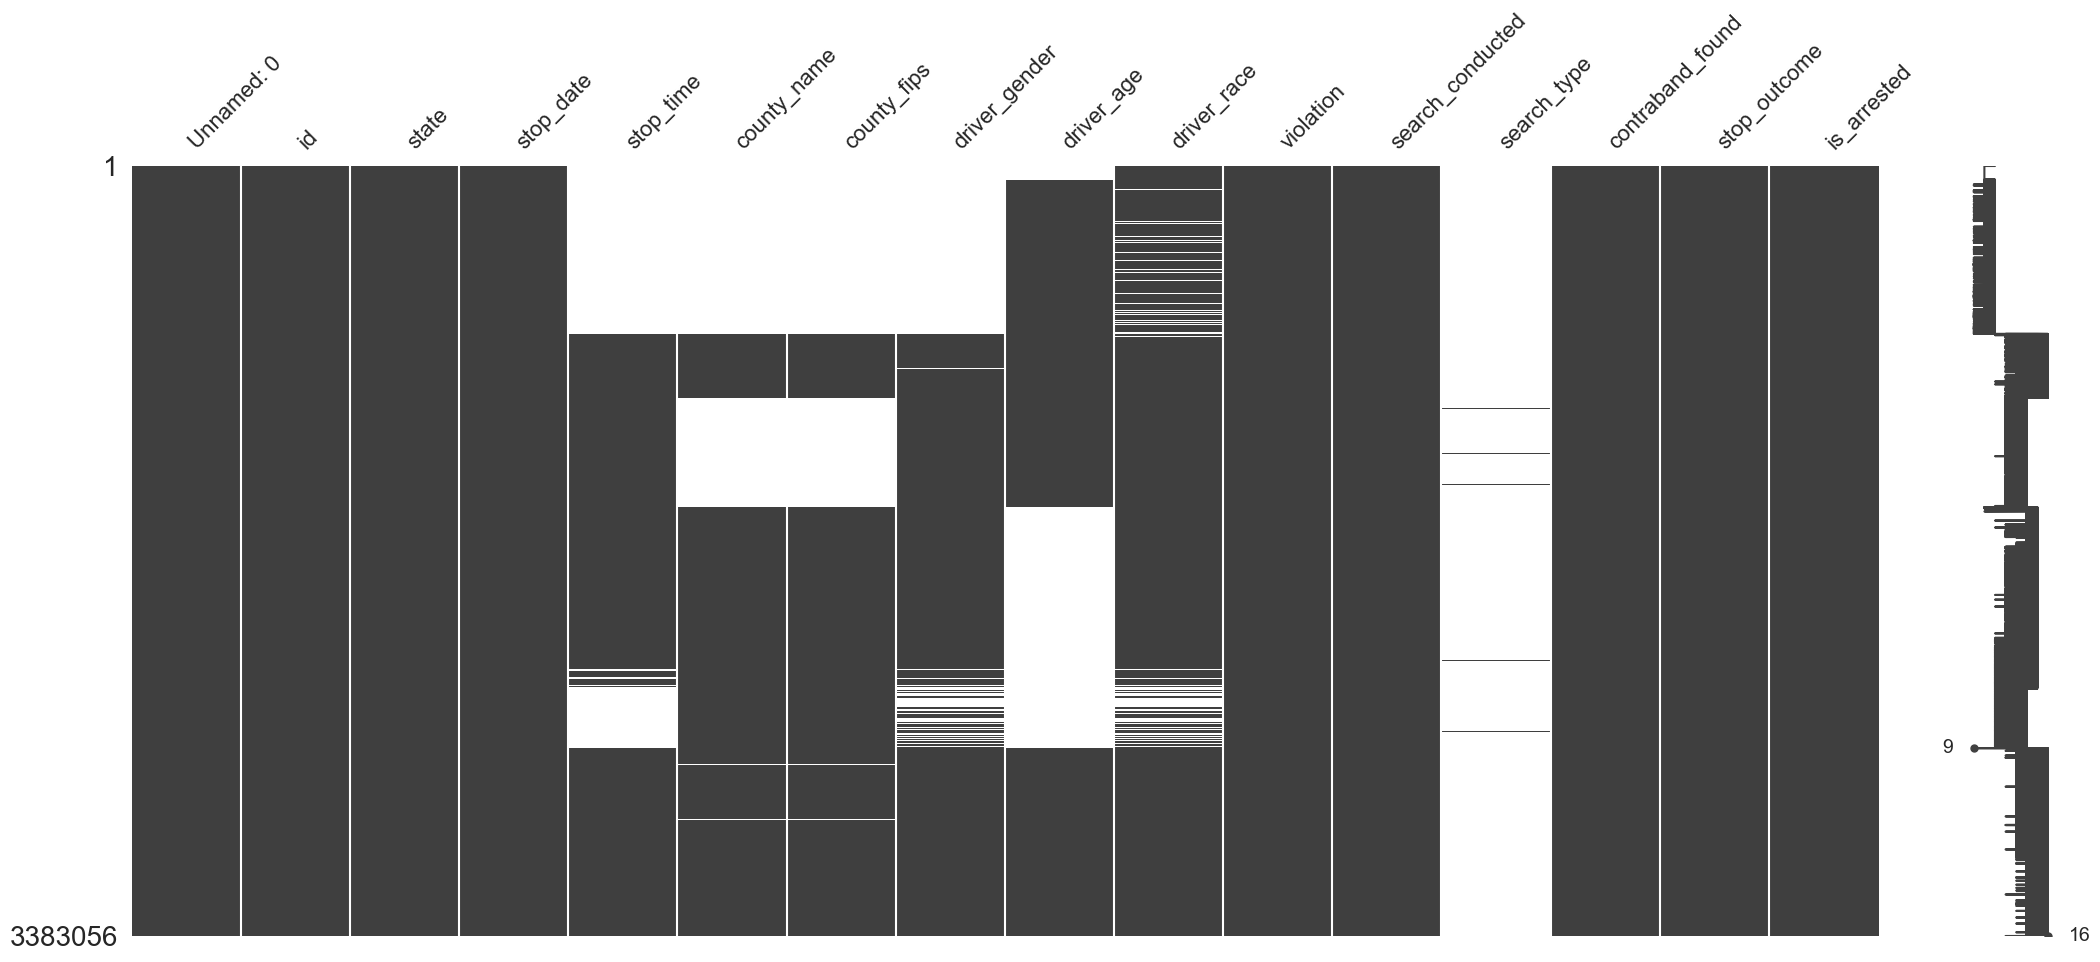

In [87]:
import missingno as msno

msno.matrix(df)


## `The rest of the nulls take up a larger percentage, so check to see if there is any correlation in null values`

<Axes: >

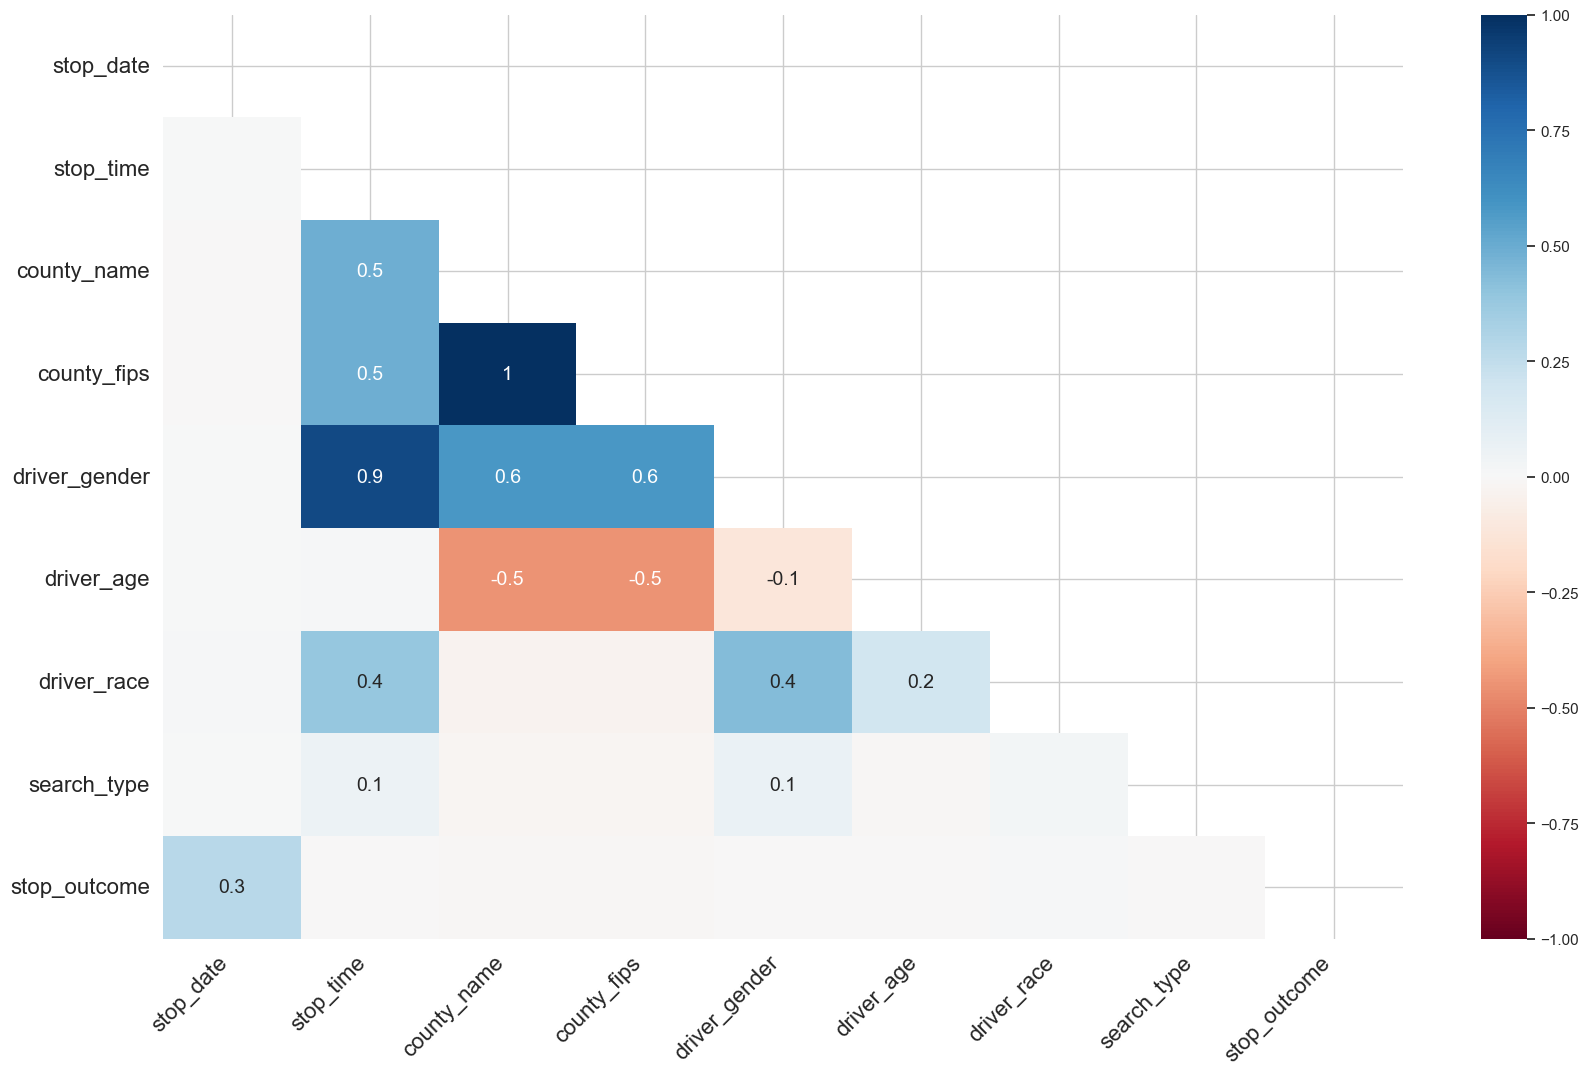

In [88]:
msno.heatmap(df)


## `View stop counts per state to see which state has most or least stops`

In [23]:
state = df['state'].fillna('N/A').value_counts().to_frame().reset_index()
state

,state,count
0,WI,1059018
1,MT,825045
2,NV,737278
3,RI,480608
4,VT,281107


## `Break down stop stats by state`

In [24]:
wisconsin = df[df.state == 'WI']
montana = df[df.state == 'MT']
nevada = df[df.state == 'NV']
rhode_island = df[df.state == 'RI']
vermont = df[df.state == 'VT']


## `Is Arrested By State`

Text(0.5, 1.0, 'Is Arrested: Vermont')

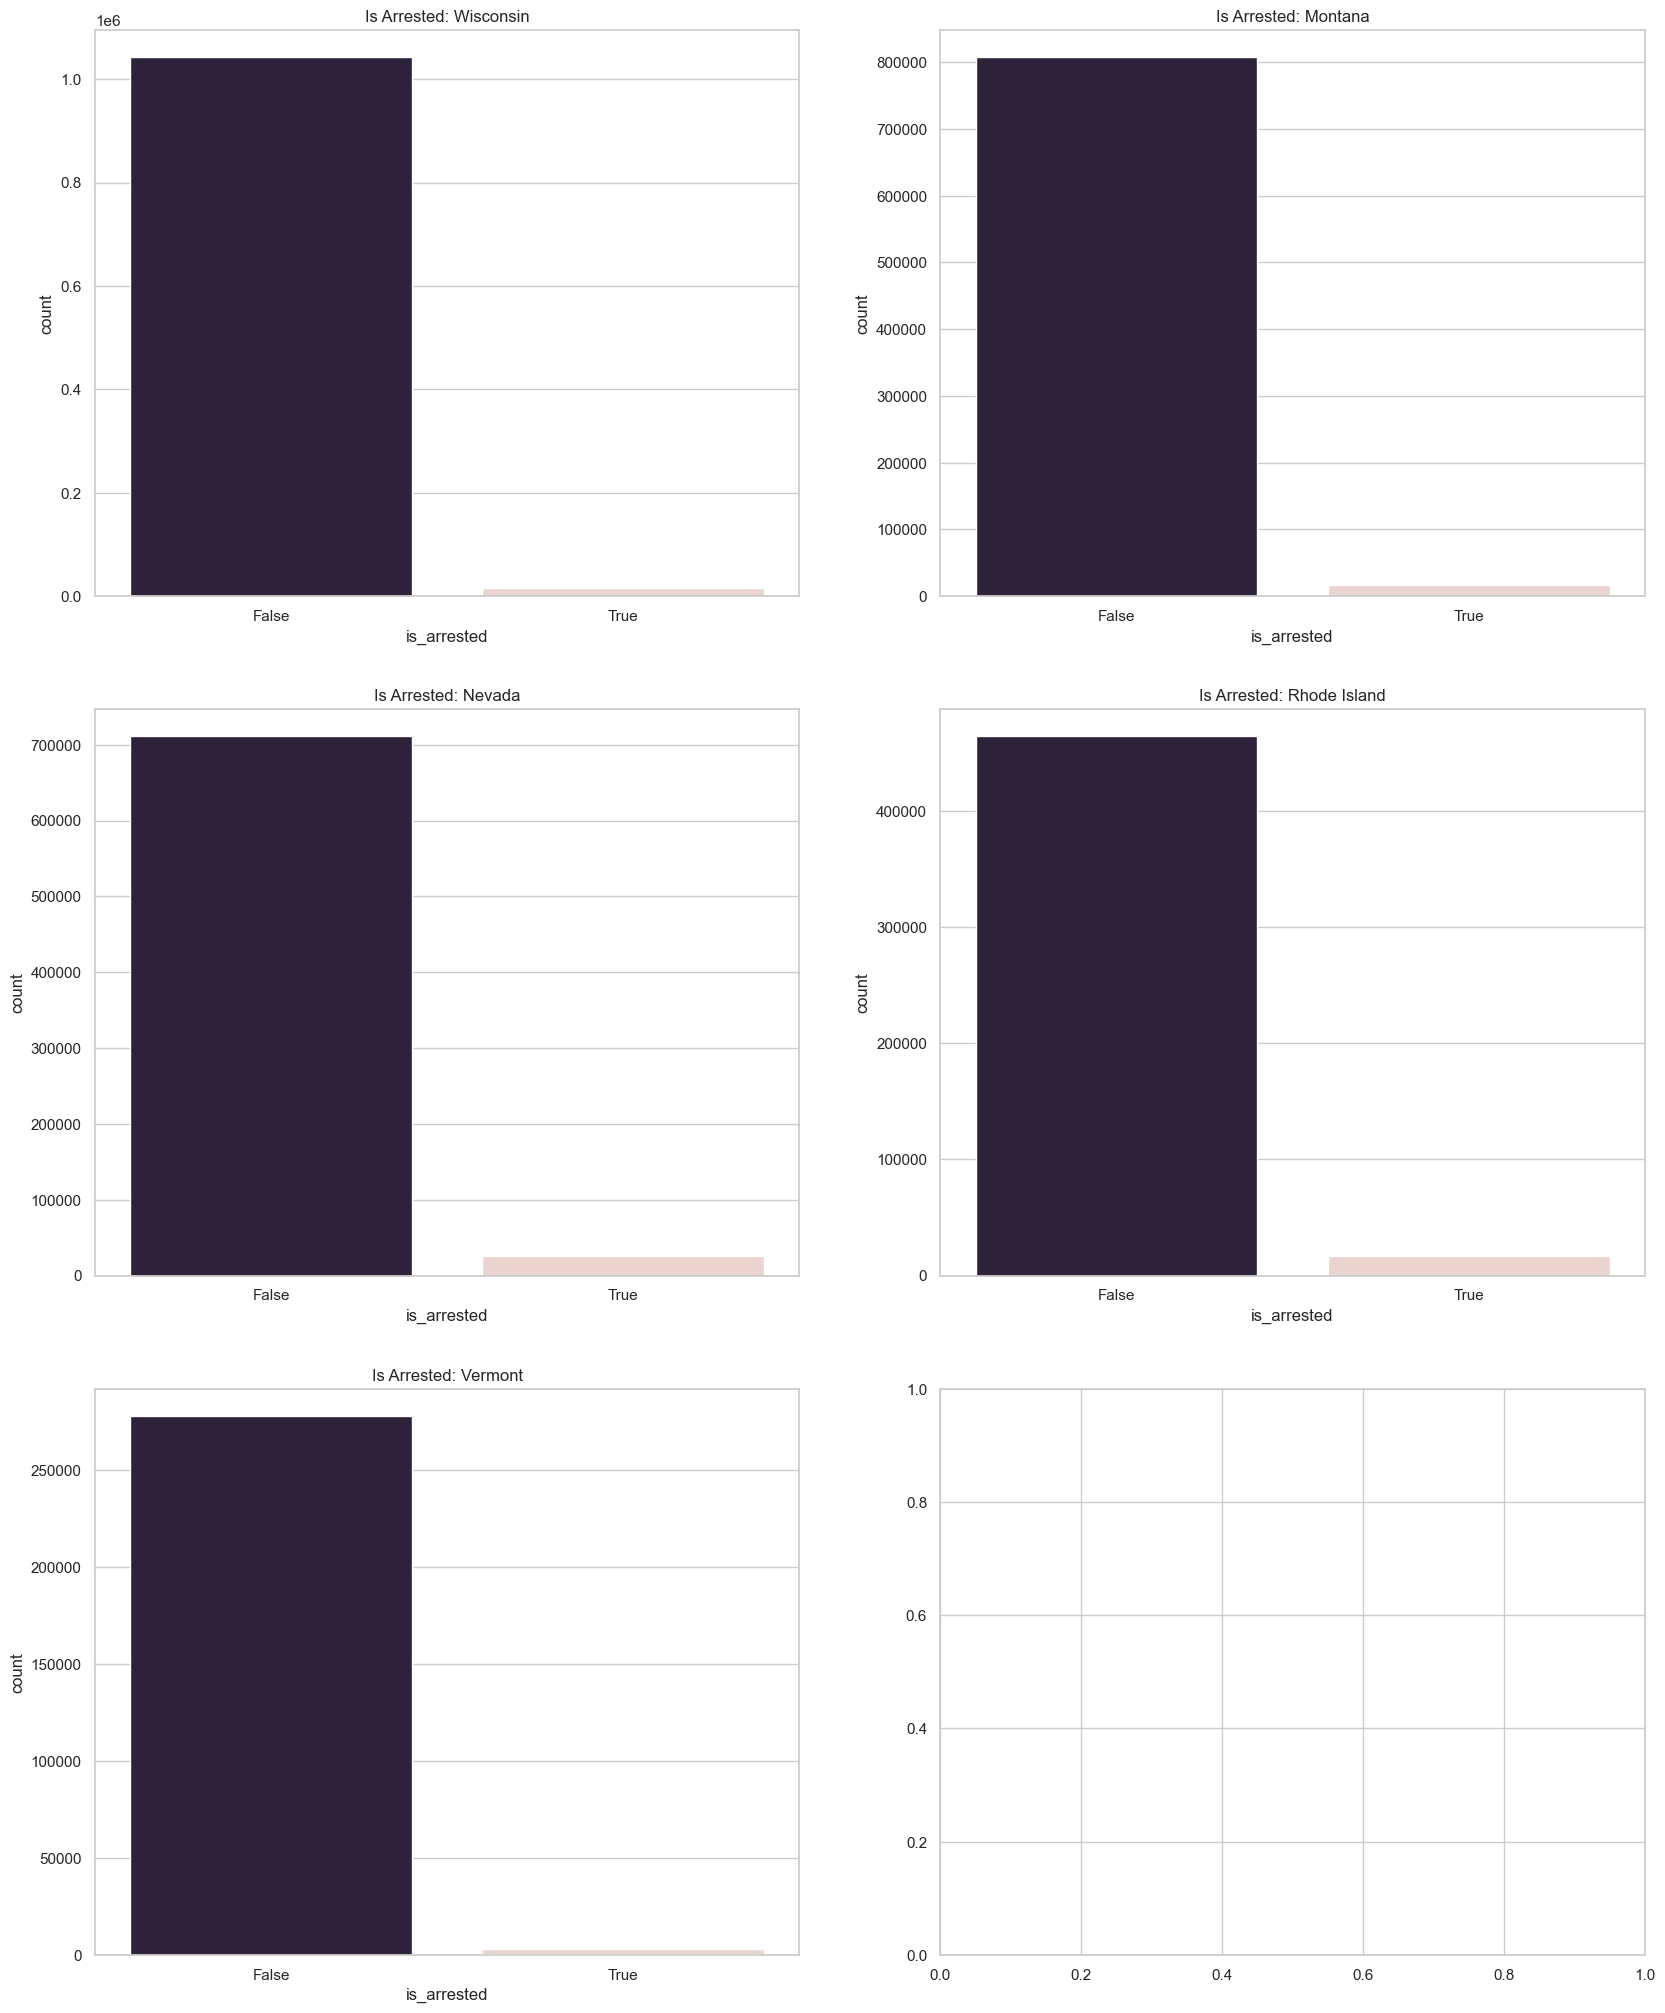

In [89]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2, figsize=(20, 25))
sns.set(style="whitegrid", color_codes=True)

is_arrested_cat_wisconsin = wisconsin['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat_wisconsin['count'] = is_arrested_cat_wisconsin['count'].astype(int)
sns.barplot(is_arrested_cat_wisconsin, x="is_arrested", y="count", hue="count", legend=False, ax=axes[0,0]).set_title("Is Arrested: Wisconsin")

is_arrested_cat_montana = montana['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat_montana['count'] = is_arrested_cat_montana['count'].astype(int)
sns.barplot(is_arrested_cat_montana, x="is_arrested", y="count", hue="count", legend=False, ax=axes[0,1]).set_title("Is Arrested: Montana")

is_arrested_cat_nevada = nevada['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat_nevada['count'] = is_arrested_cat_nevada['count'].astype(int)
sns.barplot(is_arrested_cat_nevada, x="is_arrested", y="count", hue="count", legend=False, ax=axes[1,0]).set_title("Is Arrested: Nevada")

is_arrested_cat_ri = rhode_island['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat_ri['count'] = is_arrested_cat_ri['count'].astype(int)
sns.barplot(is_arrested_cat_ri, x="is_arrested", y="count", hue="count", legend=False, ax=axes[1,1]).set_title("Is Arrested: Rhode Island")

is_arrested_cat_vermont = vermont['is_arrested'].fillna('N/A').value_counts().to_frame().reset_index()
is_arrested_cat_vermont['count'] = is_arrested_cat_vermont['count'].astype(int)
sns.barplot(is_arrested_cat_vermont, x="is_arrested", y="count", hue="count", legend=False, ax=axes[2,0]).set_title("Is Arrested: Vermont")



## `Observe Nulls in Wisconsin`

<Axes: >

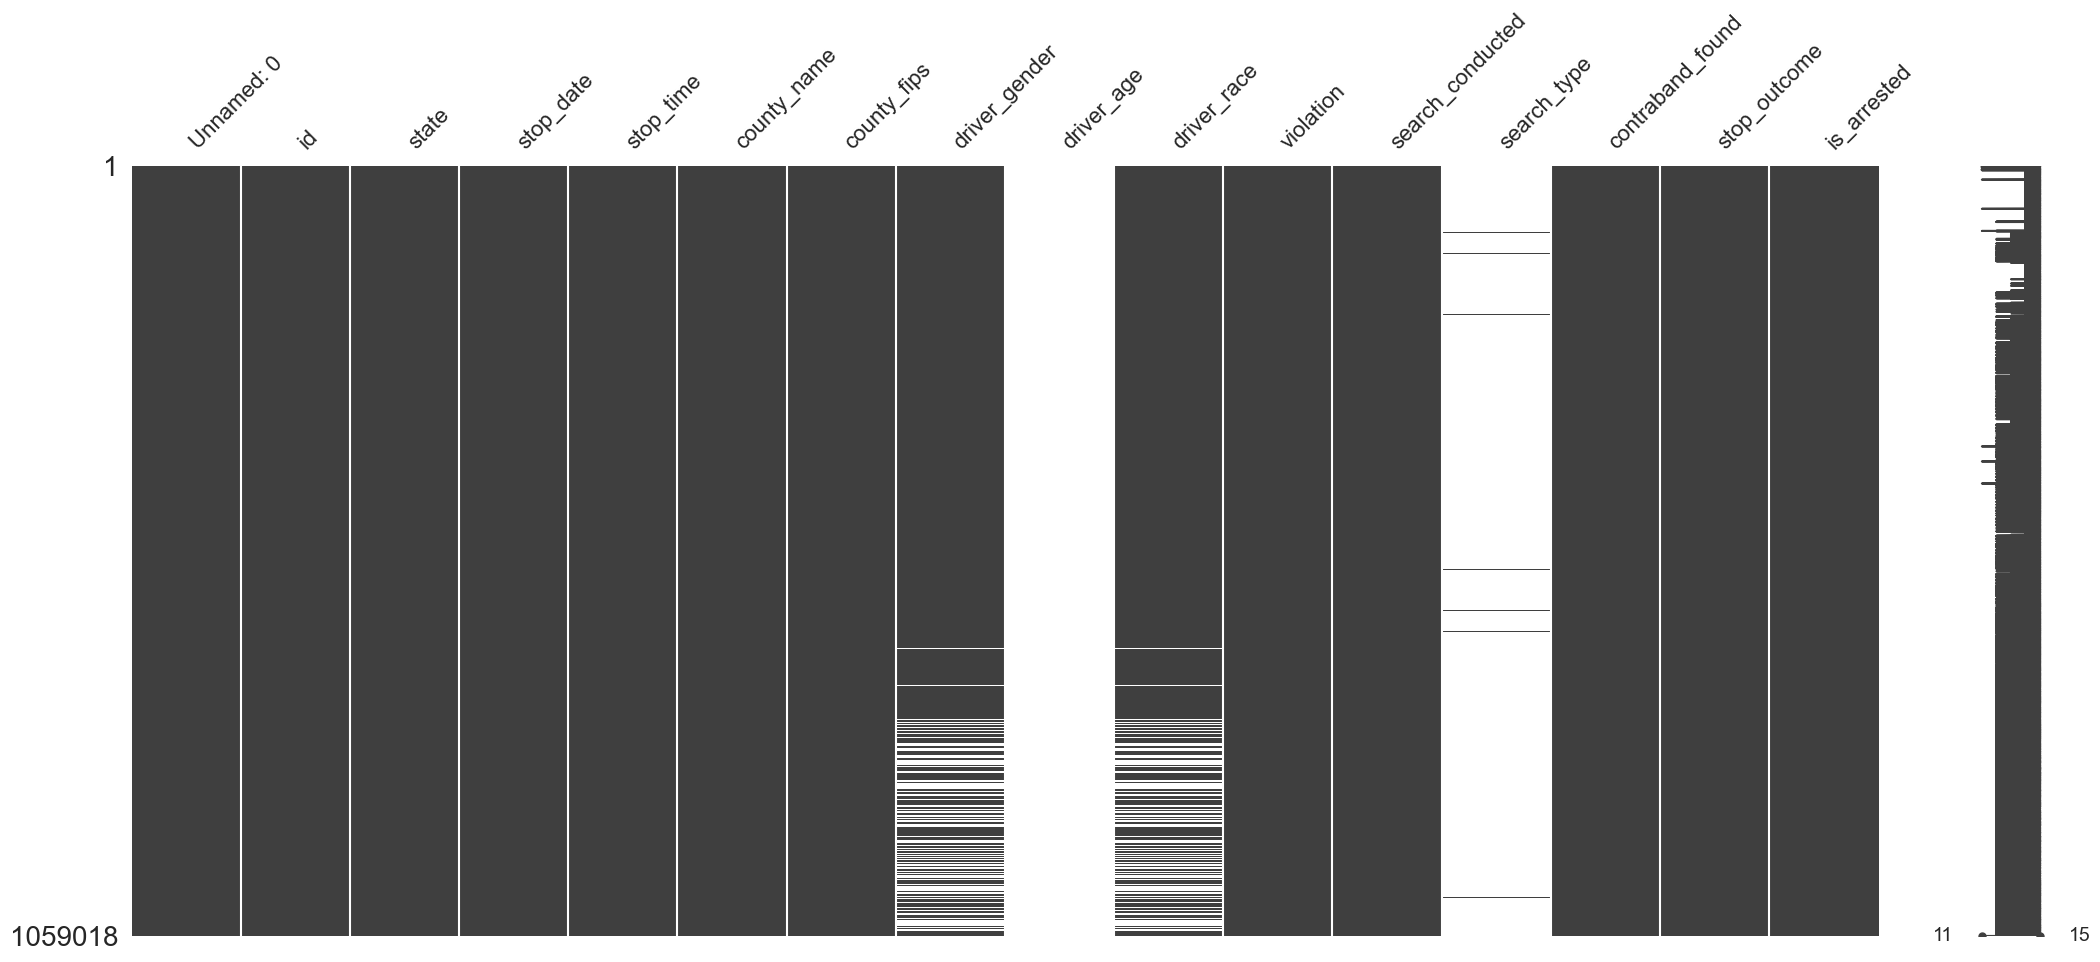

In [90]:
msno.matrix(wisconsin)


<h3>all of driver age is wisconsin is nan</h3>

## `Observe Nulls in Montana`

In [ ]:
msno.matrix(montana)


<Axes: >

<h3>search type missing</h3>

## `Observe Nulls in Nevada`

In [28]:
msno.matrix(nevada)


<h3>stop time, county_name, county fips and driver gender and search type all missing</h3>

## `Observe Nulls in Rhode Island`

In [29]:
#msno.matrix(rhode_island)


<h3>county name and country fips missing</h3>

## `Observe Nulls in Vermont`

In [30]:
#msno.matrix(vermont)


## `Lets drop columns pertainting to state since county info isn't always recorded. lets also drop search type`

In [31]:
df = df.drop(columns=['id', 'state', 'county_name', 'county_fips','search_type','Unnamed: 0'])

## `Observe percentage of nulls by state`


In [32]:
vermont.isnull().sum() / vermont.shape[0] * 100.00

Unnamed: 0           0.000000
id                   0.000000
state                0.000000
stop_date            0.000000
stop_time            0.000000
county_name          0.245102
county_fips          0.245102
driver_gender        0.593013
driver_age           0.409097
driver_race          1.586584
violation            0.000000
search_conducted     0.000000
search_type         98.790140
contraband_found     0.000000
stop_outcome         0.119527
is_arrested          0.000000
dtype: float64

In [33]:
rhode_island.isnull().sum() / rhode_island.shape[0] * 100.00

Unnamed: 0            0.000000
id                    0.000000
state                 0.000000
stop_date             0.000000
stop_time             0.000000
county_name         100.000000
county_fips         100.000000
driver_gender         0.004994
driver_age            0.341234
driver_race           0.000000
violation             0.000000
search_conducted      0.000000
search_type          96.304265
contraband_found      0.000000
stop_outcome          0.000000
is_arrested           0.000000
dtype: float64

In [34]:
nevada.isnull().sum() / nevada.shape[0] * 100.00

Unnamed: 0            0.000000
id                    0.000000
state                 0.000000
stop_date             0.001628
stop_time           100.000000
county_name         100.000000
county_fips         100.000000
driver_gender       100.000000
driver_age            8.205046
driver_race           9.359021
violation             0.000000
search_conducted      0.000000
search_type         100.000000
contraband_found      0.000000
stop_outcome          0.000000
is_arrested           0.000000
dtype: float64

## `Less than 0.1% of missing stop dates in Nevada, so let's impute stop date with the mode`


In [35]:
nevada['stop_date'] = nevada['stop_date'].fillna(nevada['stop_date'].mode()[0])


/var/folders/7y/2gf7j99j5v76461h5skcg40w0000gn/T/ipykernel_9522/2017070028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nevada['stop_date'] = nevada['stop_date'].fillna(nevada['stop_date'].mode()[0])


In [36]:
montana.isnull().sum() / montana.shape[0] * 100.00

Unnamed: 0           0.000000
id                   0.000000
state                0.000000
stop_date            0.001333
stop_time            0.001333
county_name          0.491610
county_fips          0.491610
driver_gender        0.014423
driver_age           0.421795
driver_race          0.323255
violation            0.000000
search_conducted     0.000000
search_type         99.633232
contraband_found     0.000000
stop_outcome         0.000000
is_arrested          0.000000
dtype: float64

## `Less than 0.1% of missing stop date and stop time in Montana. Let's impute stop date and stop time with the mode for Nevada`



In [37]:
montana['stop_date'] = montana['stop_date'].fillna(montana['stop_date'].mode()[0])


/var/folders/7y/2gf7j99j5v76461h5skcg40w0000gn/T/ipykernel_9522/2891792088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  montana['stop_date'] = montana['stop_date'].fillna(montana['stop_date'].mode()[0])


In [38]:
montana['stop_time'] = montana['stop_time'].fillna(montana['stop_time'].mode()[0])


/var/folders/7y/2gf7j99j5v76461h5skcg40w0000gn/T/ipykernel_9522/302611067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  montana['stop_time'] = montana['stop_time'].fillna(montana['stop_time'].mode()[0])


In [39]:
wisconsin.isnull().sum() / wisconsin.shape[0] * 100.00

Unnamed: 0            0.000000
id                    0.000000
state                 0.000000
stop_date             0.008121
stop_time            27.044394
county_name           0.000000
county_fips           0.000000
driver_gender        14.433749
driver_age          100.000000
driver_race          14.504286
violation             0.000000
search_conducted      0.000000
search_type          98.662535
contraband_found      0.000000
stop_outcome          0.011142
is_arrested           0.000000
dtype: float64

## `Less than 0.1% of missing stop date and stop time in Wisconsin. Let's impute stop date and stop time with the mode for Wisconsin`

In [40]:
wisconsin['stop_date'] = wisconsin['stop_date'].fillna(wisconsin['stop_date'].mode()[0])


/var/folders/7y/2gf7j99j5v76461h5skcg40w0000gn/T/ipykernel_9522/3428814904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisconsin['stop_date'] = wisconsin['stop_date'].fillna(wisconsin['stop_date'].mode()[0])


In [41]:
wisconsin['stop_time'] = wisconsin['stop_time'].fillna(wisconsin['stop_time'].mode()[0])


/var/folders/7y/2gf7j99j5v76461h5skcg40w0000gn/T/ipykernel_9522/1814881261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisconsin['stop_time'] = wisconsin['stop_time'].fillna(wisconsin['stop_time'].mode()[0])


## `Now that imputation by state is done, let's bring all the states together in the same data frame`

In [42]:
df = pd.concat([wisconsin, montana, nevada, vermont, rhode_island])

## `Let's One-Hot encode the state`

In [43]:
one_hot_state = pd.get_dummies(df['state'])
one_hot_state['MT'] = one_hot_state['MT'].apply(lambda x: 0 if x == False else 1)
one_hot_state['VT'] = one_hot_state['VT'].apply(lambda x: 0 if x == False else 1)
one_hot_state['RI'] = one_hot_state['RI'].apply(lambda x: 0 if x == False else 1)
one_hot_state['NV'] = one_hot_state['NV'].apply(lambda x: 0 if x == False else 1)
one_hot_state['WI'] = one_hot_state['WI'].apply(lambda x: 0 if x == False else 1)
df = pd.merge(df, one_hot_state, left_index=True, right_index=True)


In [44]:
#df['stop_time'] = df['stop_time'].fillna(df['stop_time'].mode()[0])


In [45]:
#df.isnull().sum() / df.shape[0] * 100.00

## `Since state has been encoded, remove state and other columns we won't be using.`

In [46]:
df = df.drop(columns=['id', 'state', 'county_name', 'county_fips','search_type','Unnamed: 0'])

In [47]:
#df.isnull().sum() / df.shape[0] * 100.00

## `Let's bin similar violations and then One-Hot Encode them`

<h3>Put violation into it's own data frame</h3>

In [48]:
df_violation = df[['violation']]

<h3>Violations are grouped together by comma, so split up multiple violations</h3>

In [49]:
violation_list = []
for v in df_violation['violation']:
    v_split = v.split(",")
    violation_list.extend(v_split)
violation_list = list(set(violation_list))

In [50]:
violation_list.sort()

In [51]:
violation_list.remove('Other (non-mapped)')

<h3>One-Hot encode Violation</h3>

In [52]:
%%capture
for unique_v in violation_list:
    df_violation[unique_v] = 0
    df_violation[unique_v] = df_violation['violation'].str.contains(unique_v).apply(lambda x: 1 if x else 0)



## `Merge Encoded violations back to main data frame`

In [53]:
df = pd.merge(df, df_violation, left_index=True, right_index=True)


In [54]:
df = df.drop(columns=['violation_x', 'violation_y'])

## `Let's see the correlation of stop outcome and arrest`

<h3>Encode stop outcome</h3>

In [55]:
def outcome(x):
    if pd.notna(x):
        x = x.lower()
        if ('arrest' in x):
            return 1
        else:
            return 0

# Apply the function to column 'A'
df['stop_outcome_arrested'] = df['stop_outcome'].apply(outcome)


In [56]:
contingency_table_ao = pd.crosstab(df['stop_outcome_arrested'], df['is_arrested'])
#sns.heatmap(contingency_table_ao, annot=True, cmap="YlGnBu").set_title("Is Arrested vs Stop Outcome Arrested")


In [57]:
df['stop_outcome_arrested'].value_counts().to_frame().reset_index()

,stop_outcome_arrested,count
0,0.0,3303324
1,1.0,79278


<h3>drop stop outcome because it's so highly coorelated with arrest. This is removing redundancy</h3>

In [58]:
df = df.drop(columns=['stop_outcome_arrested', 'stop_outcome'])

## `Bin stop date and stop time into quarters`

In [59]:
df['stop_date'] = df['stop_date'].astype(str)


In [60]:

df['stop_time'] = df['stop_time'].astype(object)
df['stop_date'] = df['stop_date'].astype(object)

df['stop_time_binned'] = 0
df['stop_day_binned'] = 0


def bin_time(j):
        try:
            if ('00:' in j or '01:' in j or '02:' in j or '03:' in j or '04:' in j or '05:' in j):
                return 1
            if ('06:' in j or '07:' in j or '08:' in j or '09:' in j or '10:' in j or '11:' in j):
                return 2
            if ('12:' in j or '13:' in j or '14:' in j or '15:' in j or '16:' in j or '17:' in j):
                return 3
            if ('18:' in j or '19:' in j or '20:' in j or '21:' in j or '22:' in j or '23:' in j):
                return 4
        except:
            pass

# Apply the function to each row
df['stop_time_binned'] = df['stop_time'].apply(bin_time)


def bin_day(j):
        try:
            if ('-01-' in j or '-02-' in j or '-03-' in j):
                return 1
            if ('-04-' in j or '-05-' in j or '-06-' in j):
                return 2
            if ('-07-' in j or '-08-' in j or '-09-' in j):
                return 3
            if  ('-10-' in j or '-11-' in j or '-12-' in j):
                return 4
        except:
            pass

# Apply the function to each row
df['stop_day_binned'] = df['stop_date'].apply(bin_day)



<h3>Drop stop date and stop time since it's been binned</h3>

In [61]:
df = df.drop(columns=['stop_date', 'stop_time'])

## `One-Hot Encode Race`

In [62]:
one_hot_race = pd.get_dummies(df['driver_race'])
#one_hot_race
one_hot_race['Asian'] = one_hot_race['Asian'].apply(lambda x: 0 if x == False else 1)
one_hot_race['Black'] = one_hot_race['Black'].apply(lambda x: 0 if x == False else 1)
one_hot_race['Hispanic'] = one_hot_race['Hispanic'].apply(lambda x: 0 if x == False else 1)
one_hot_race['Other'] = one_hot_race['Other'].apply(lambda x: 0 if x == False else 1)
one_hot_race['White'] = one_hot_race['White'].apply(lambda x: 0 if x == False else 1)
df = pd.merge(df, one_hot_race, left_index=True, right_index=True)
df = df.drop(columns=['driver_race'])
#df_imputed

## `Turn categorical columns into binary`

In [63]:
df['driver_gender'] = df['driver_gender'].apply(lambda x: 0 if x == 'F' else 1)
df['search_conducted'] = df['search_conducted'].apply(lambda x: 0 if x == False else 1)
df['contraband_found'] = df['contraband_found'].apply(lambda x: 0 if x == False else 1)
df['is_arrested'] = df['is_arrested'].apply(lambda x: 0 if x == False else 1)


<h3>Update column names</h3>

In [64]:
df = df.rename(columns={"Other_x": "Other_violation", "Other_y": "Other_race"})

## `Use Iterative Imputer to apply machine learning to imputate mising values`

In [65]:

import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an IterativeImputer object
imputer = IterativeImputer()

# Fit and transform the data
df_imputed = imputer.fit_transform(df)

# Convert the result back to a dataframe
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

<h3>Change data frame name</h3>

In [66]:
df = df_imputed

<h3>Update column type to int</h3>

In [67]:
for col in df.columns.tolist():
    df[col] = df[col].astype(int)


In [68]:
#!pip install imblearn

## `Use SMOTE to fix is_arrested class imbalance`

In [69]:
X = df.drop('is_arrested', axis=1)
y = df['is_arrested']

from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy='minority')

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the shape of the resampled data
print(X_resampled.shape, y_resampled.shape)

(6607556, 30) (6607556,)


In [70]:
df_smote = pd.merge(X_resampled, y_resampled, left_index=True, right_index=True)


<h3>Get equal amount of rows for positive and negative class</h3>

In [71]:
df_neg = df_smote.loc[df_smote['is_arrested'] == 0]
df_pos = df_smote.loc[df_smote['is_arrested'] == 1]


In [72]:
df_neg = df_neg.tail(200000)
df_pos = df_pos.tail(200000)


In [73]:
df_smote = pd.concat([df_pos, df_neg])

In [74]:
df_smote['is_arrested'].value_counts()

is_arrested
1    200000
0    200000
Name: count, dtype: int64

# `Model Training`

In [75]:
X = df_smote[[
'driver_gender',
 'driver_age',
 'search_conducted',
 'contraband_found',
 'MT',
 'NV',
 'RI',
 'VT',
 'WI',
 'Cell phone',
 'DUI',
 'Equipment',
 'License',
 'Lights',
 'Moving violation',
 'Other_violation',
 'Paperwork',
 'Registration/plates',
 'Safe movement',
 'Seat belt',
 'Speeding',
 'Stop sign/light',
 'Truck',
 'stop_time_binned',
 'stop_day_binned',
 'Asian',
 'Black',
 'Hispanic',
 'Other_race',
 'White' ]]
Y = df_smote[['is_arrested']]

## `Get train and test`

In [76]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

seed = 10
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed,shuffle=True)

## `Normalize Driver Age`

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train['driver_age'] = scaler.fit_transform(X_train[['driver_age']])
X_test['driver_age'] = scaler.fit_transform(X_test[['driver_age']])


# `Train the model`

In [78]:
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# fit model no training data
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# in a product env I would do a grid search, but running out of RAM in google colab
# reduce overfitting with hyper-parameter
model = XGBClassifier()
model.fit(X_train, y_train)
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=100 )

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=100, random_state=42)

# `Model metrics`

In [79]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.38%


In [80]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
f1 = f1_score(y_test, y_pred)
f1

0.9212091435664046

In [81]:
from sklearn.metrics import classification_report
report = classification_report(y_test['is_arrested'].tolist(), y_pred.tolist(), output_dict=True)
pd.DataFrame(report).transpose()


,precision,recall,f1-score,support
0,0.896385,0.958223,0.926273,39950.000000
1,0.955247,0.889513,0.921209,40050.000000
accuracy,0.923825,0.923825,0.923825,0.923825
macro avg,0.925816,0.923868,0.923741,80000.000000
weighted avg,0.925853,0.923825,0.923738,80000.000000


In [82]:
confusion_matrix(y_test['is_arrested'].tolist(), y_pred.tolist())

array([[38281,  1669],
       [ 4425, 35625]])

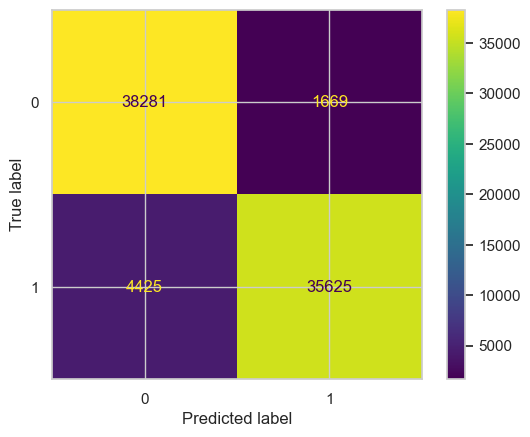

In [83]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test['is_arrested'].tolist(), y_pred.tolist())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

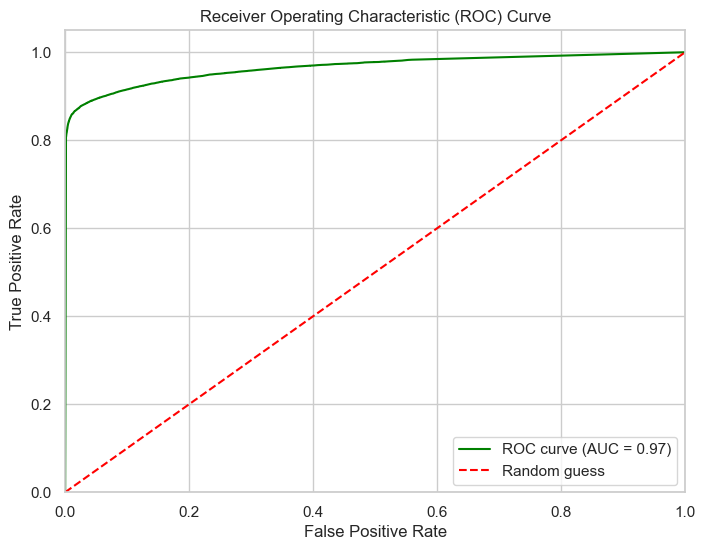

In [84]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#roc curve is the tpr vs fpr
# roc is the probability curve, tells how much model is capable of distinguishing between the classes
# tpr also known as recall, mentioned earlier
# fpr is 1-specificity, true negative rate